## Project Name: Data-Driven A/B Test Design and Data Analysis For Conversion Rates

Introduction: In today's competitive digital landscape, optimizing conversion rates is crucial for driving business success. A/B testing provides a robust framework for comparing different versions of a website or app, helping organizations identify which changes lead to higher user engagement and conversion. By leveraging data-driven approaches to design and analyze A/B tests, businesses can make informed decisions, minimize guesswork, and implement targeted strategies that significantly improve user experience and maximize conversion rates.

## Step-by-Step Test Design Process

### Phase 1: Define Test Objective:

 * Goal: Improve the website’s conversion rate by 15%.
    
 * Focus Area: Product page layout.

### Phase 2. Primary or Sucess Metric: Conversion 

Formula: Conversion Rate = Conversions / Visitors
    
This is the main metric to evaluate whether the new variant performs better than the control.

Baseline Conversion Rate: 10%

### Phase 3. Secondary Metrics (based on Primary Metric):

These metrics will give deeper insights into user behavior and ensure there are no negative side effects 
on other important aspects of the website.

#### Secondary Metrics

 * Bounce Rate: Percentage of visitors who leave the website without interacting.
 
     
 * Pages Per Session: Average number of pages viewed per user session.
 
     
 * Average Order Value (AOV): Total revenue divided by the number of orders.
 
     
 * Session Duration: Average time spent on the website.
 
     
 * Exit Rate: Percentage of users who leave the site after visiting a specific page.

### Phase 4. Formulate Hypothesis:

Hypothesis: "Adding trust badges near the 'Buy Now' button will reduce user hesitation and increase purchases."


### Phase 5. Determine Variable to Test

Control Group (A): Current product page layout without trust badges.

Variation Group (B): Product page layout with prominently displayed trust badges near the 'Buy Now' button.

### Phase 6. Hypothesis Generate:

Null Hypothesis (H₀): There is no significant difference in conversion rates between the Control group A and Variant groups B.

Formula for Null Hypotheis: H0 : Conversion Rate (Control) = Conversion Rate (Variant)

Alternative Hypothesis (H₁): There is a significant difference in conversion rates between the Control group A and Variant groups B.


Formula for Alternative Hypotheis: H0 : Conversion Rate (Control) != Conversion Rate (Variant)


### Phase 7. Calculate Sample Size - To calculate the required sample size per group

Baseline Conversion Rate ( p0 )= 10%

Minimum detectable effect (MDE): 15% increase

Significance level (α): 5%

Power (1−𝛽): 80%

#### Python Code for Calculate sample Size Group

In [34]:
import math

# Define parameters
p1=0.1 #baseline conversion rate 10%
mde=0.15 # 15% improvment
new=mde*p1 # calculation: new= MDE * Baseline conversion rate
p2= new + p1 # New conversion rate after MDE
   
#Significance level and Power
   
alpha=0.05 # significance level 95%
power=0.8 #power 80%
   
# Z score for significance level and Power
   
z_alpha=stats.norm.ppf(1-alpha/2)
z_beta=stats.norm.ppf(power)
   
print(f"BaseLine Conversion rate {p1}")
print(f"Want to Improvment {mde}")
print(f"New Conversion rate after MDE {p2}")
print(f"Significance Level {alpha}")
print(f"Power {power}")
print(f"Z score for significance level{z_alpha}")
print(f"Z score for power {power}")
   
# Calculate Sample Size
numerator=((z_alpha+z_beta)**2)*(p1*(1-p1)+p2*(1-p2))
demerator=(p2-p1)**2
sample_size_per_group=numerator/demerator
sample_size_per_group = math.ceil(sample_size_per_group)
Total_Sample_size=sample_size_per_group*2
print(f"Sample Size need for AB Test {Total_Sample_size}")
  
#Output results
print(f"Required sample size per group: {int(sample_size_per_group)}")
print(f"Total sample size: {int(2 * sample_size_per_group)}")

BaseLine Conversion rate 0.1
Want to Improvment 0.15
New Conversion rate after MDE 0.115
Significance Level 0.05
Power 0.8
Z score for significance level1.959963984540054
Z score for power 0.8
Sample Size need for AB Test 13380
Required sample size per group: 6690
Total sample size: 13380


### Phase 8. Test Duration: To calculate the number of days required to run an A/B test

Daily traffic per group: How many visitors are available per day for each variant (A and B)?

Sample size per group: The total sample size calculated per group.

Formula: Test Duration (in days) = Sample size per group / Daily traffic per group

#### Python Code

In [35]:
daily_traffic=1500 # your website current daily trafficTot
Total_Sample_size # previous calculation
test_duration= Total_Sample_size/daily_traffic
test_duration = math.ceil(test_duration)  # Round up to the next whole day
print(f"Test Duration: {test_duration} days")

Test Duration: 9 days


### Phase 9: Develop Variations

Control (A): Current product page without trust badges.

Variation (B): New design featuring trust badges near the CTA button, highlighting security and satisfaction guarantees.

### Phase 10: Launch the Test

Target audience: All website visitors on the product page.

Traffic split: 50% of users assigned to Control (A) and 50% to Variation (B).

Monitor performance daily to ensure:

       No technical issues.

       Balanced traffic distribution.


### After Running the Test

After running the A/B test for 9 days starting from the test's launch, we have now collected the data and are ready to begin the analysis.

# Import important Library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from scipy import stats

# Data Load 

In [2]:
data=pd.read_csv(r'F:\full_data.csv')
data.head()

,Unnamed: 0,userid,Date,group Name,impression,click,revenue,session duration,conversion,exit rate
0,0,1,2024-10-02,Control,294,20,0,175.11,0,0.40
1,1,2,2024-11-25,Control,312,13,0,203.49,0,0.62
2,2,3,2024-11-02,Control,280,15,0,288.82,0,0.47
3,3,4,2024-11-10,Control,305,14,692,272.95,1,0.44
4,4,5,2024-10-18,Control,319,26,0,148.98,0,0.55


In [3]:
#backup data
df=data.copy()

# Data Description

Data Columns: 

userid: A unique identifier assigned to each user to track their activity and interactions.

Date: The date on which the data or activity was recorded.

group Name: Either "Control" or "Experimental".

impression: The number of times an item (e.g., an ad, product, or webpage) was shown to the user.

click: The number of times the user clicked on the shown item (e.g., an ad or product link).

revenue: The total income generated from a user's actions, typically from clicks or purchases.

session duration: The total time a user spends interacting with the platform or website during a single session.

conversion: The number or percentage of users who completed a desired action (e.g., a purchase )

exit rate: The percentage of users who leave the site or session after viewing a particular page or after completing their interactions.

# Understand Data

In [4]:
# to check first five rows
df.head(3)

,Unnamed: 0,userid,Date,group Name,impression,click,revenue,session duration,conversion,exit rate
0,0,1,2024-10-02,Control,294,20,0,175.11,0,0.40
1,1,2,2024-11-25,Control,312,13,0,203.49,0,0.62
2,2,3,2024-11-02,Control,280,15,0,288.82,0,0.47


In [5]:
# to check last five rows
df.tail(3)

,Unnamed: 0,userid,Date,group Name,impression,click,revenue,session duration,conversion,exit rate
13377,13377,6688,2024-10-09,Experimental,341,16,810,141.09,1,0.46
13378,13378,6689,2024-11-08,Experimental,299,16,0,223.11,0,0.31
13379,13379,6690,2024-11-11,Experimental,300,27,810,284.90,1,0.54


In [6]:
# to check sample five rows
df.sample(3)

,Unnamed: 0,userid,Date,group Name,impression,click,revenue,session duration,conversion,exit rate
1395,1395,1396,2024-10-03,Control,301,13,0,156.95,0,0.63
5597,5597,5598,2024-11-23,Control,282,19,0,170.28,0,0.30
10968,10968,4279,2024-10-11,Experimental,292,11,810,277.58,1,0.56


In [7]:
# to check columns name
df.columns

Index(['Unnamed: 0', 'userid', 'Date', 'group Name', 'impression', 'click',
       'revenue', 'session duration', 'conversion', 'exit rate'],
      dtype='object')

In [8]:
# to check data shape
df.shape


(13380, 10)

In [9]:
#to check basic info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13380 entries, 0 to 13379
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        13380 non-null  int64  
 1   userid            13380 non-null  int64  
 2   Date              13380 non-null  object 
 3   group Name        13380 non-null  object 
 4   impression        13380 non-null  int64  
 5   click             13380 non-null  int64  
 6   revenue           13380 non-null  int64  
 7   session duration  13380 non-null  float64
 8   conversion        13380 non-null  int64  
 9   exit rate         13380 non-null  float64
dtypes: float64(2), int64(6), object(2)
memory usage: 1.0+ MB


In [10]:
# to check basic statistics
df.describe()

,Unnamed: 0,userid,impression,click,revenue,session duration,conversion,exit rate
count,13380.000000,13380.000000,13380.000000,13380.000000,13380.000000,13380.000000,13380.000000,13380.000000
mean,6689.500000,3345.500000,299.970478,15.042975,369.807324,165.450993,0.492003,0.448875
std,3862.617636,1931.308802,17.479394,3.882768,378.055962,78.066971,0.499955,0.144312
min,0.000000,1.000000,237.000000,2.000000,0.000000,30.010000,0.000000,0.200000
25%,3344.750000,1673.000000,288.000000,12.000000,0.000000,98.260000,0.000000,0.320000
50%,6689.500000,3345.500000,300.000000,15.000000,0.000000,166.020000,0.000000,0.450000
75%,10034.250000,5018.000000,312.000000,18.000000,692.000000,233.432500,1.000000,0.570000
max,13379.000000,6690.000000,372.000000,31.000000,810.000000,299.990000,1.000000,0.700000


# Data Cleaning & Preperation

In [11]:
# to check null values
df.isnull().sum()

Unnamed: 0          0
userid              0
Date                0
group Name          0
impression          0
click               0
revenue             0
session duration    0
conversion          0
exit rate           0
dtype: int64

My Dataset has no null Values.

In [12]:
# to check duplicated value
df.duplicated().sum()

0

My Dataset Has no Duplicated Value

In [13]:
# remove unwanted columns
df.drop(columns=['Unnamed: 0'],inplace=True)

In [15]:
# convert date columnd
df['Date']=pd.to_datetime(df['Date'])

In [17]:
# extract day name
df['Day_Name']=df['Date'].dt.day_name()

In [19]:
df['Month_Name']=df['Date'].dt.month_name()

In [20]:
def wek_flag(value):
    if value=='Satrday':
        return "weekend"
    elif value=='Sunday':
        return 'weekend'
    else:
        return 'weekday'

In [21]:
df['week_flag']=df['Day_Name'].apply(wek_flag)

In [28]:
df.head(2)

,userid,Date,group Name,impression,click,revenue,session duration,conversion,exit rate,Day_Name,Month_Name,week_flag,CTR
0,1,2024-10-02,Control,294,20,0,175.11,0,0.40,Wednesday,October,weekday,0.07
1,2,2024-11-25,Control,312,13,0,203.49,0,0.62,Monday,November,weekday,0.04


In [65]:
# create ctr columns
df['CTR']=round((df['click']/df['impression'])*100,2)

In [45]:
df['CR']=round((df['conversion']/df['click'])*100,2)

In [37]:
df.rename(columns={'session duration':'session_duration(sec)'},inplace=True)

# Exploratory Data Analysis

In [48]:
df.head()

,userid,Date,group Name,impression,click,revenue,session_duration(sec),conversion,exit rate,Day_Name,Month_Name,week_flag,CTR,CR
0,1,2024-10-02,Control,294,20,0,175.11,0,0.40,Wednesday,October,weekday,0.07,0.00
1,2,2024-11-25,Control,312,13,0,203.49,0,0.62,Monday,November,weekday,0.04,0.00
2,3,2024-11-02,Control,280,15,0,288.82,0,0.47,Saturday,November,weekday,0.05,0.00
3,4,2024-11-10,Control,305,14,692,272.95,1,0.44,Sunday,November,weekend,0.05,7.14
4,5,2024-10-18,Control,319,26,0,148.98,0,0.55,Friday,October,weekday,0.08,0.00


In [49]:
df['group Name'].value_counts()

Control         6690
Experimental    6690
Name: group Name, dtype: int64

In [58]:
control_group=df[df['group Name']=='Control']
Experimental_group=df[df['group Name']=='Experimental']

### Conversion Rate Comparison  Between Two Groups

Conversion Rate for Control group 48.67
Conversion Rate for Control group 49.73


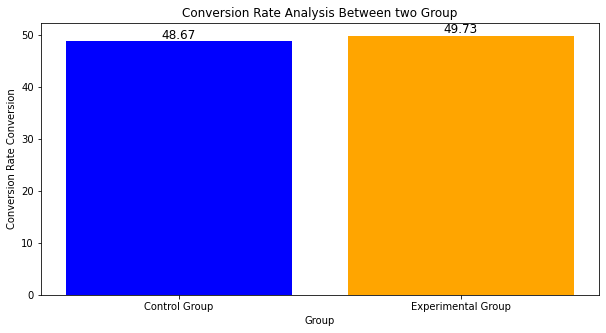

In [110]:
# conversion Rate for control group
count_user=control_group['userid'].count()
conversions=control_group[control_group['conversion']==1]
total_conversions=conversions['conversion'].sum()
conversion_rate_control_group=round((total_conversions/count_user)*100,2)

#conversion rate for experimentak group
count_user=Experimental_group['userid'].count()
total_conversion=Experimental_group['conversion'].sum()
conversion_rate_Experimental_group=round((total_conversion/count_user)*100,2)

#Data For The conversion Rate
group=['Control Group','Experimental Group']
CR_Value=[conversion_rate_control_group,conversion_rate_Experimental_group]

print(f"Conversion Rate for Control group {conversion_rate_control_group}")
print(f"Conversion Rate for Control group {conversion_rate_Experimental_group}")

#Create a Bar Graph
plt.figure(figsize=(10,5))
bars=plt.bar(group,CR_Value,color=['blue','orange'])

# Add labels on top of each bar
for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), 
             f'{bar.get_height():.2f}', 
             ha='center', va='bottom', fontsize=12)
    
# Add Label
plt.title('Conversion Rate Analysis Between two Group')
plt.xlabel('Group')
plt.ylabel('Conversion Rate Conversion');


#### Insight:
    
* The conversion rate for the control group is 48.67%, indicating a solid baseline for comparison.

* The conversion rate for the Experimental group is 49.73%, which shows a slight improvement of approximately 1.06% over the control group.

### Conversion Count for Two Group

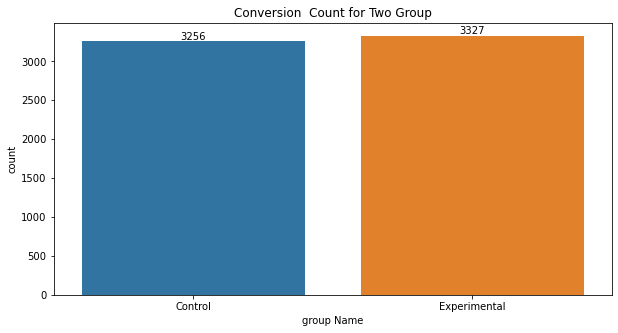

In [78]:
data_con=df[df['conversion']==1]
plt.figure(figsize=(10,5))
ax=sns.countplot(data=data_con,x=data_con['group Name'])
for container in ax.containers:
    ax.bar_label(container)
plt.title('Conversion  Count for Two Group');

### Insight:

** The control group has a conversion count of 3,256, reflecting the baseline performance.

** The experimental group has a conversion count of 3,327, showing an increase of 71 conversions, which indicates a positive effect of the experimental treatment.

### CTR Analysis for two group

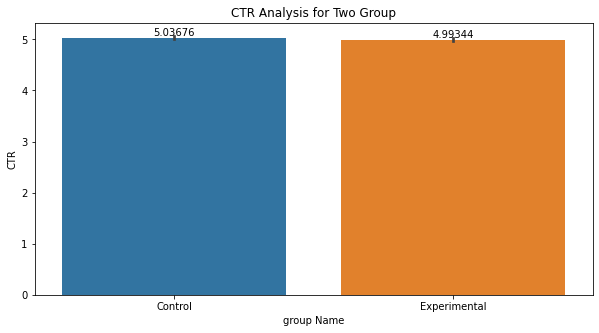

In [67]:
plt.figure(figsize=(10,5))
ax=sns.barplot(data=df,x=df['group Name'],y=df['CTR'])
for container in ax.containers:
    ax.bar_label(container)
plt.title('CTR Analysis for Two Group');

### Insight:

** The click-through rate (CTR) for the control group is 5.03%, serving as the baseline for comparison.

** The CTR for the experimental group is 4.99%, showing a slight decrease of 0.04%, suggesting minimal impact from the experimental treatment.

### Average Order Value Analysis

Average Order Value for Control Group 336.79402092675633
Average Order Value for Experimental  Group 402.8206278026906


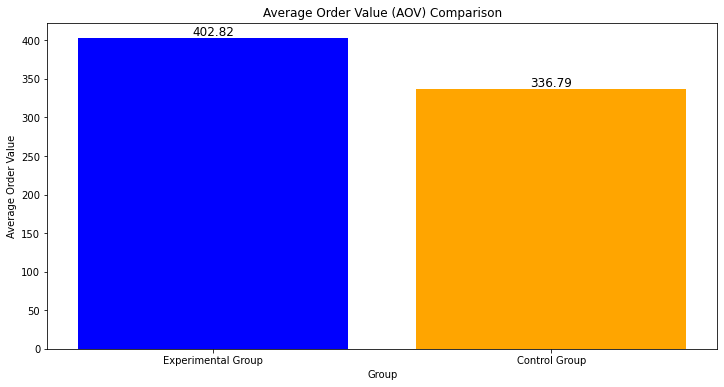

In [90]:
# Calculate AOV for Experimental Group
count_user_experimental = Experimental_group['userid'].count()
total_revenue_experimental = Experimental_group['revenue'].sum()
AOV_experimental_group = total_revenue_experimental / count_user_experimental

# Calculate AOV for Control Group
count_user_control = control_group['userid'].count()
total_revenue_control = conversions['revenue'].sum()
AOV_control_group = total_revenue_control / count_user_control

# Data for the bar chart
groups = ['Experimental Group', 'Control Group']
AOV_values = [AOV_experimental_group, AOV_control_group]

print(f"Average Order Value for Control Group {AOV_control_group}")
print(f"Average Order Value for Experimental  Group {AOV_experimental_group}")

# Create a bar graph
plt.figure(figsize=(12,6))
bars=plt.bar(groups, AOV_values, color=['blue', 'orange'])
for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), 
             f'{bar.get_height():.2f}', 
             ha='center', va='bottom', fontsize=12)

# Add titles and labels
plt.title('Average Order Value (AOV) Comparison')
plt.ylabel('Average Order Value')
plt.xlabel('Group')

# Show the bar graph
plt.show()


#Insight:

** The Average Order Value (AOV) for the Control Group is 336.79, providing a baseline for comparison.

** The Experimental Group shows an increased AOV of 402.82, indicating a positive impact of the experimental treatment, with a significant improvement over the control group.

### Average Session Duration Analysis

In [115]:
session_group=df.groupby('group Name')['session_duration(sec)'].mean().reset_index()

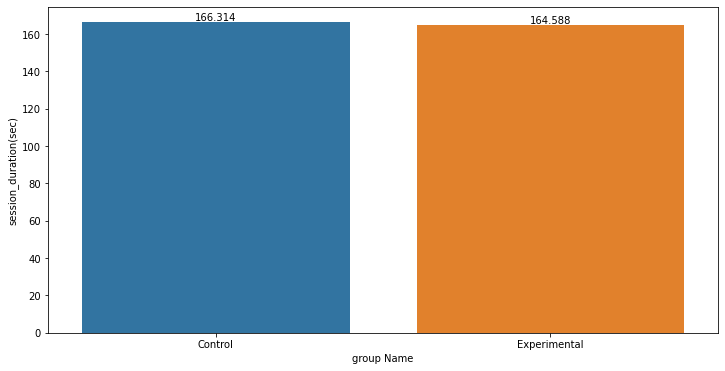

In [116]:
plt.figure(figsize=(12,6))
ax=sns.barplot(data=session_group,x=session_group['group Name'],y=session_group['session_duration(sec)'])
for container in ax.containers:
    ax.bar_label(container)


# Insight:

** The average session duration for the Control Group is 166.31 seconds, serving as the baseline for comparison.

** The Experimental Group shows a slightly shorter average session duration of 164.59 seconds, suggesting a small decrease in user engagement compared to the control group.

### Average Exit Rate Analysis

In [121]:
exit_group=df.groupby('group Name')['exit rate'].mean().reset_index()

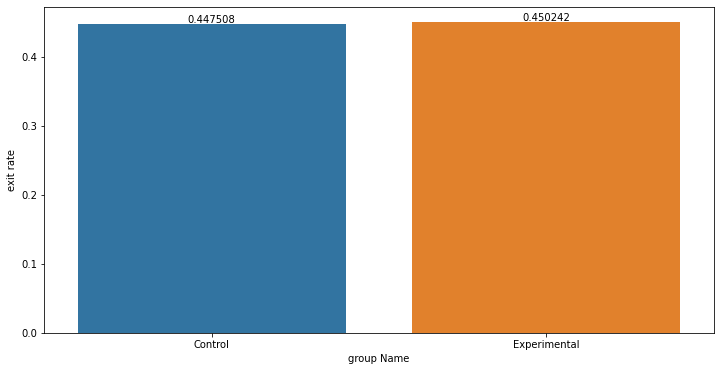

In [123]:
plt.figure(figsize=(12,6))
ax=sns.barplot(data=exit_group,x=exit_group['group Name'],y=exit_group['exit rate'])
for container in ax.containers:
    ax.bar_label(container)

### Insight:

* The exit rate for the Control Group is 0.447, providing the baseline for comparison.


* The Experimental Group has a slightly higher exit rate of 0.450, indicating a marginal increase in the number of users leaving the site compared to the control group.

### Revenue Analysis between two Group


In [129]:
revenue_group=df.groupby('group Name')['revenue'].sum().reset_index()

Revenue between two group      group Name  revenue
0       Control  2253152
1  Experimental  2694870


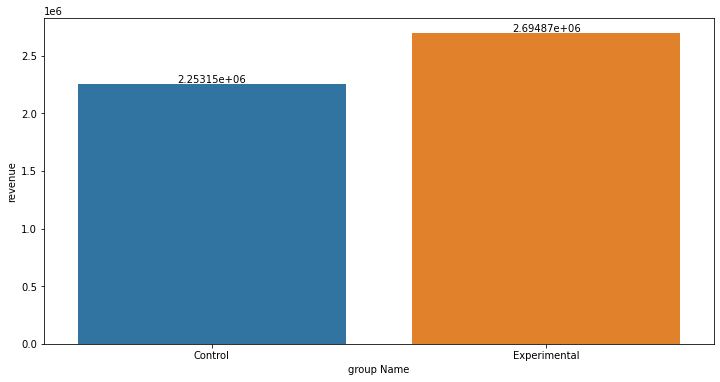

In [133]:
print(f"Revenue between two group {revenue_group}")
plt.figure(figsize=(12,6))
ax=sns.barplot(data=revenue_group,x=revenue_group['group Name'],y=revenue_group['revenue'])
for container in ax.containers:
    ax.bar_label(container)

### Insight:

** The Experimental group generated a revenue of 2,694,870, which is higher than the Control group's revenue of 2,253,152.


** Despite the higher revenue in the Experimental group, further analysis is needed (e.g., A/B testing) to determine if the difference is statistically significant and not due to random variation.

### Hypothesis Testing

Null Hypothesis (H₀): There is no significant difference in conversion rates between the Control group and experimental  groups.

Formula for Null Hypotheis: H0 : Conversion Rate (Control) = Conversion Rate (Variant)

Alternative Hypothesis (H₁): There is a significant difference in conversion rates between the Control group and experimental groups .

Formula for Alternative Hypotheis: H0 : Conversion Rate (Control) != Conversion Rate (Variant)

In [134]:
import scipy.stats as stats


# Perform two-sample t-test
t_stat, p_value = stats.ttest_ind(a=control_group['conversion'], b=Experimental_group['conversion'],equal_var=False)

# Output the t-statistic and p-value
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

# Interpret the p-value
if p_value < 0.05:
    print("Reject the null hypothesis:There is significant difference between the groups .")
else:
    print("Accept the null hypothesis: There is no significant difference between the groups.")


T-statistic: -1.2277440766914567
P-value: 0.2195646563424548
Accept the null hypothesis: There is no significant difference between the groups.


### Insights:
   
Decision:

Since p-value (0.2196) is greater than α (0.05), we fail to reject the null hypothesis.

### Conclusion:

There is no statistically significant difference between the control and experimental groups in this study.

The observed difference in means (48.67 vs. 49.73) is likely due to random variation rather than a meaningful effect.
Interpretation:

Based on the p-value, the evidence is insufficient to claim that the experimental treatment or condition has a different impact than the control group.

The null hypothesis that there is no difference between the groups cannot be rejected at the 5% significance level.

### Implications:

The results suggest that the control and experimental groups behave similarly, and no strong evidence supports that the experimental treatment has a significant effect.

Further research or a larger sample size may be needed to detect a meaningful difference, if one exists.

This insight provides a clear and concise summary based on the results of the t-test.



